In [1]:
import lib
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import os

In [197]:
ns=200
nd=300
bias = 0.17
ndR = 13
k = 0.05
la = 0.526754
fA = 0.1
beta1 = 0.95
beta2 = 0.1
beta3 = 0.01
beta4 = 5.5

decay_steps = 10000
n_tested_patterns = 500
initial_steps = 20000

seed = 238
rng = np.random.default_rng(seed)

neuron = lib.Neuron9(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=k, ndR=ndR, fA=fA, w_len=1., beta1=beta1, beta2=beta2, beta3=beta3, beta4=beta4, seed=rng.integers(100000))

xs_gen = lib.Xs_Generator2(fA=fA, ns=ns, normalizedQ=True, seed=rng.integers(100000))

simulation_run = lib.Simulation_Run(neuron, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, seed=rng.integers(100000))

In [198]:
simulation_run.run()

100%|██████████| 10500/10500 [00:17<00:00, 603.77it/s]


In [199]:
votes_mean = np.mean(simulation_run.votes_record, axis=0)[:decay_steps]
votes_lower99 = np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps]
votes_upper99 = np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps]
n0 = np.mean(votes_upper99[-4000:])
print("n0 =", n0)
n0 = np.ceil(n0)

n0 = 3.993


In [200]:
false_negative_prob = np.mean(simulation_run.votes_record <= n0, axis=0)[:decay_steps]

(0.0, 1000.0)

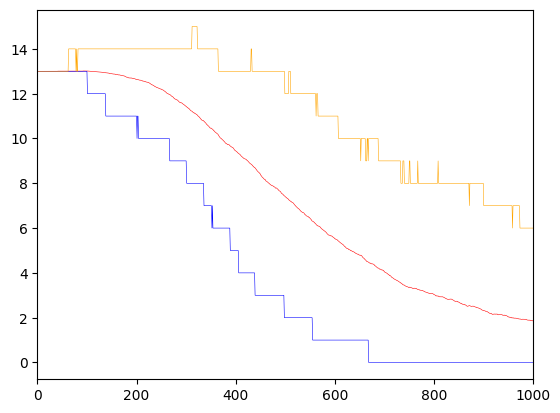

In [201]:
plt.plot(votes_mean, c="red", linewidth=0.4, label="normal")
plt.plot(votes_lower99, c="blue", linewidth=0.4)
plt.plot(votes_upper99, c="orange", linewidth=0.4)
plt.xlim(0, 1000)

(0.0, 0.1)

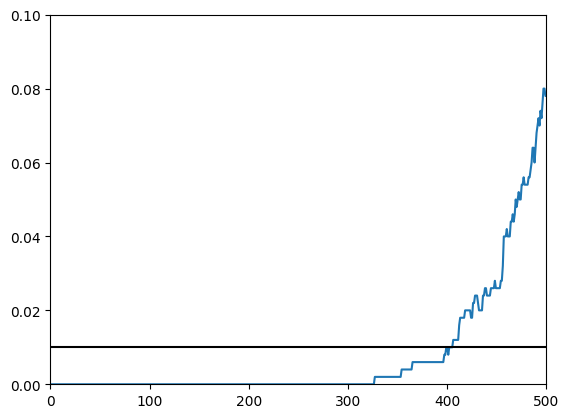

In [202]:
plt.plot(false_negative_prob)
plt.hlines(0.01, 0, decay_steps, colors="black")
plt.xlim(0, 500)
plt.ylim(0, 0.1)

In [203]:
cross_pos = np.array(np.nonzero(np.bitwise_and((false_negative_prob[1:] >= 0.01), false_negative_prob[:-1] < 0.01))).reshape((-1, ))
capacity = (np.min(cross_pos) + np.max(cross_pos))/2
print("capacity =", capacity)

capacity = 399.5


In [204]:
try:
    os.mkdir(f"data/6/6_{beta3}_{beta4}")
except:
    pass
np.save(f"data/6/6_{beta3}_{beta4}/votes_mean", votes_mean)
np.save(f"data/6/6_{beta3}_{beta4}/votes_lower99", votes_lower99)
np.save(f"data/6/6_{beta3}_{beta4}/votes_upper99", votes_upper99)
np.save(f"data/6/6_{beta3}_{beta4}/false_negative", false_negative_prob)

In [79]:
# np.save("data/6/b3_b4_capacity", np.array([[0, 0, 0.]]))

In [80]:
# tmp = np.load("data/6/b3_b4_capacity.npy")
# tmp = np.concatenate((tmp, np.array([[beta3, beta4, capacity]]))).reshape((-1, 3))
# np.save("data/6/b3_b4_capacity.npy", tmp)

In [210]:
tmp = np.load("data/6/b3_b4_capacity.npy")
tmp

array([[0.000e+00, 0.000e+00, 0.000e+00],
       [5.000e-02, 5.000e-01, 3.480e+02],
       [5.000e-02, 1.000e+00, 3.755e+02],
       [5.000e-02, 1.200e+00, 3.660e+02],
       [5.000e-02, 8.000e-01, 3.490e+02],
       [5.000e-02, 9.000e-01, 3.840e+02],
       [5.000e-02, 6.000e-01, 3.500e+02],
       [5.000e-02, 7.000e-01, 3.785e+02],
       [5.000e-02, 1.100e+00, 3.810e+02],
       [2.500e-02, 9.000e-01, 3.625e+02],
       [0.000e+00, 0.000e+00, 3.280e+02]])

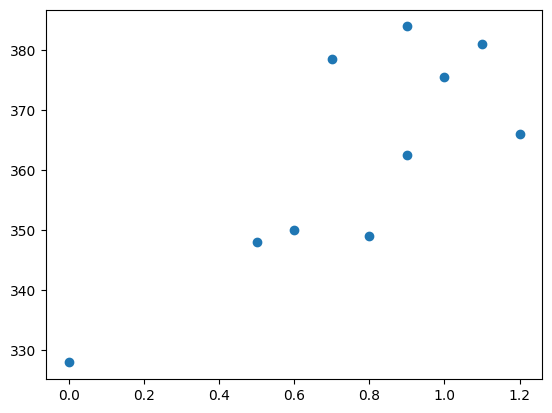

In [12]:
plt.scatter(tmp[1:, 1], tmp[1:, 2])

In [205]:
votes0_mean = np.load("data/6/6_0.0_0.0/votes_mean.npy")
votes0_upper = np.load("data/6/6_0.0_0.0/votes_upper99.npy")
votes0_lower = np.load("data/6/6_0.0_0.0/votes_lower99.npy")

votes1_mean = np.load("data/6/6_0.01_5.5/votes_mean.npy")
votes1_upper = np.load("data/6/6_0.01_5.5/votes_upper99.npy")
votes1_lower = np.load("data/6/6_0.01_5.5/votes_lower99.npy")

(0.0, 1000.0)

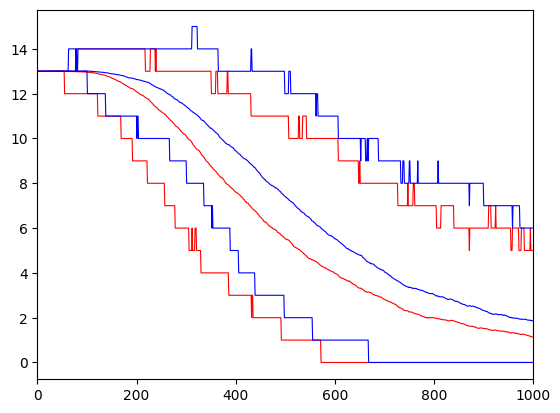

In [208]:
plt.plot(votes0_mean, c="red", linewidth=0.8)
plt.plot(votes0_lower, c="red", linewidth=0.8)
plt.plot(votes0_upper, c="red", linewidth=0.8)

plt.plot(votes1_mean, c="blue", linewidth=0.8)
plt.plot(votes1_lower, c="blue", linewidth=0.8)
plt.plot(votes1_upper, c="blue", linewidth=0.8)

plt.xlim(0, 1000)

In [209]:
400/60000

0.006666666666666667